# Balancing Price and Green Quality in Presence of Consumer Environmental Awareness: A Green Supply Chain Coordination Approach

In [7]:
def demand(a, b, e, p, tau):
    return a - b*p + tau*e
def profit(a, b, c, e, h, p, w, tau, v=0, phi=0):
    return ((1-v)*w - c) * demand(a, b, e, p, tau) - (1-phi) * h*e**2

## Centralized model

In [2]:
def cal_e_c_star(a, b, c, h, tau):
    e_c_star = tau * (a - b*c) / (4*b*h - tau**2)
    return e_c_star

def cal_p_c_star(a, b, c, h, tau):
    p_c_star = (2*a*h + 2*b*c*h - c*tau**2) / (4*b*h - tau**2)
    return p_c_star

def cal_d_c_star(a, b, e_c_star, p_c_star, tau):
    d_c_star = demand(a, b, e_c_star, p_c_star, tau)
    return d_c_star

# profit for manufacturer
def cal_pi_m_c_star(a, b, c, e_c_star, h, p_c_star, w, tau):
    return profit(a, b, c, e_c_star, h, p_c_star, w, tau)

# profit for retailer
def cal_pi_r_c_star(a, b, w, e_c_star, p_c_star, tau):
    return profit(a, b, w, e_c_star, 0, p_c_star, p_c_star, tau)

## Decentralized model

In [5]:
def cal_e_d_star(tau, w, c, h):
    e_d_star = tau * (w - c) / (2*h)
    return e_d_star

def cal_p_d_star(h, a, b, w, c, tau):
    p_d_star = (2*h * (a + b*w) + (w - c)*tau**2) / (4*b*h)
    return p_d_star

def cal_d_d_star(a, b, e_d_star, p_d_star, tau):
    d_d_star = demand(a, b, e_d_star, p_d_star, tau)
    return d_d_star

# profit for manufacturer
def cal_pi_m_d_star(a, b, c, e_d_star, h, p_d_star, w, tau):
    return profit(a, b, c, e_d_star, h, p_d_star, w, tau)

# profit for retailer
def cal_pi_r_d_star(a, b, w, e_d_star, p_d_star, tau):
    return profit(a, b, w, e_d_star, 0, p_d_star, p_d_star, tau)

## Hybrid greening cost and revenue sharing contract (HGRS)

In [1]:
def find_v(a, b, e_c_star, p_c_star, e_d_star, p_d_star, tau, w, phi):
    v_ub = (profit(a, b, c - wr, e_c_star, h, p_c_star, p_c_star, tau, 0, phi) - profit(a, b, c, e_d_star, h, p_d_star, w, tau)) / (p_c_star*demand(a, b, e_c_star, p_c_star, tau))
    v_lb = (profit(a, b, w, e_d_star, h, p_d_star, p_d_star, tau, 0, 1) + profit(a, b, 0, e_c_star, h, p_c_star, wr, tau, 0, 1-phi)) / (p_c_star*demand(a, b, e_c_star, p_c_star, tau))
    return [v_lb, v_ub]

def find_phi(a, b, c, h, tau, v):
    part1 = v**2*(-a*tau**2 + 4*a*b*h - 4*b**2*c*h + b*c*tau**2) + v*(a*tau**2 + 4*a*b*h - 4*b**2*c*h - b*c*tau**2)
    part2 = (v - 1)*((v*(a-b*c)*(32*b**2*c*h*tau**2 - 8*b*c*tau**4 + v*(a*tau**4 - 9*b*c*tau**4 + 16*a*b**2*h**2 - 16*b**3*c*h**2 + 24*b**2*c*h*tau**2 + 8*a*b*h*tau**2))))**0.5
    ans1 = (part1+part2)/(8*b*h*v*(a-b*c))
    ans2 = (part1-part2)/(8*b*h*v*(a-b*c))
    if ans1 < 0 or ans1 > 1:
        ans1 = -1
    if ans2 < 0 or ans2 > 1:
        ans2 = -1
    return ans1, ans2

def find_wr(a, b, c, h, tau, v, phi):
    wr = c*v*(1+phi)/(1+v) - v*(4*a*h - c*tau**2)*(phi-v)/(4*b*h - tau**2)/(v + 1)
    return wr

def cal_e_HGRS_star(a, b, c, h, phi, v, tau, wr):
    e_HGRS_star = tau * (2*b*v*(wr - c) + (1-v)*(v*a + wr*b)) / (4*b*h*v*(1-phi) - tau**2*v*(1-v))
    return e_HGRS_star

def cal_p_HGRS_star(a, b, c, h, phi, v, tau, wr):
    p_HGRS_star = (tau**2*v*(wr - c) + 2*h*(1-phi)*(v*a + wr*b)) / (4*b*h*v*(1-phi) - tau**2*v*(1-v))
    return p_HGRS_star

def cal_D_HGRS_star(a, b, e_HGRS_star, p_HGRS_star, tau):
    D_HGRS_star = demand(a, b, e_HGRS_star, p_HGRS_star, tau)
    return D_HGRS_star


# profit for manufacturer
def cal_Pi_m_HGRS_star(a, b, c, wr, e_HGRS_star, h, p_HGRS_star, tau, v, phi):
    Pi_m_HGRS_star = profit(a, b, c - wr, e_HGRS_star, h, p_HGRS_star, p_HGRS_star, tau, v, phi)
    return Pi_m_HGRS_star

# profit for retailer
def cal_Pi_r_HGRS_star(a, b, wr, e_HGRS_star, h, p_HGRS_star, tau, v, phi):
    Pi_r_HGRS_star = profit(a, b, wr, e_HGRS_star, h, p_HGRS_star, p_HGRS_star, tau, 1 - v, 1 - phi)
    return Pi_r_HGRS_star

## Picture of feasible intervals for the contract parameter v

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

# Due to errors in the formulas in the paper, it is necessary to use a solver to determine the correct value of phi
def find_phi(a, b, c, h, tau, v):
    phi = symbols('x')
    expr = c*v*(1+phi)/(1+v) - v*(4*a*h - c*tau**2)*(phi-v)/(4*b*h - tau**2)/(v + 1) \
           - ((c*v*tau**2 - 2*v*a*h*(1-phi))/(v*tau**2 + 2*b*h*(1-phi)) + ((4*v*b*h*(1-phi) - tau**2*v*(1-v))/((v*tau**2+2*b*h*(1-phi)))) * (2*h*(a+b*c) - c*tau**2)/(4*b*h-tau**2))
    sol = solve(expr, phi)
    phi = 0
    for p in sol:
        if p > 0 or p < 1:
            phi = p
    return min(sol)


def draw_plot(a, b, c, tau, w, h, V, ylim:int, title:str):
    ## Decentralized model
    e_d_star = cal_e_d_star(tau, w ,c ,h)
    p_d_star = cal_p_d_star(h, a, b, w, c, tau)

    # profit for manufacturer
    Pi_m_c_star = profit(a, b, c, e_d_star, h, p_d_star, w, tau)
    # profit for retailer
    Pi_r_c_star = profit(a, b, w, e_d_star, 0, p_d_star, p_d_star, tau)

    Pi_m_c_star_Y = [Pi_m_c_star]*11
    Pi_r_c_star_Y = [Pi_r_c_star]*11


    ##　Hybrid contract
    Pi_m_HGRS_star_Y, Pi_r_HGRS_star_Y = [], []
    wr_list = []
    for v in V:
        # calculate phi, wr, e, p
        phi = find_phi(a, b, c, h, tau, v)

        wr = find_wr(a, b, c, h, tau, v, phi)
        e_HGRS_star = cal_e_HGRS_star(a, b, c, h, phi, v, tau, wr)
        p_HGRS_star = cal_p_HGRS_star(a, b, c, h, phi, v, tau, wr)

        wr_list.append(wr)

        # profit for manufacturer
        Pi_m_HGRS_star = cal_Pi_m_HGRS_star(a, b, c, wr, e_HGRS_star, h, p_HGRS_star, tau, v, phi)
        Pi_m_HGRS_star_Y.append(Pi_m_HGRS_star)

        # profit for retailer
        Pi_r_HGRS_star = cal_Pi_r_HGRS_star(a, b, wr, e_HGRS_star, h, p_HGRS_star, tau, v, phi)
        Pi_r_HGRS_star_Y.append(Pi_r_HGRS_star)

    ## Plot
    X = np.linspace(0, 1, 11)

    fig, ax1 = plt.subplots()

    # the first line and the first Y-axis
    line1, = ax1.plot(X, Pi_m_c_star_Y, label='Decentralized-Manufacturer', color='black', linestyle='--')

    ax1.set_xlabel('v')
    ax1.set_ylabel('Manufacturer\'s Profit', color='black')
    ax1.tick_params('y', colors='black')
    ax1.set_ylim(0, ylim)
    ax1.set_xlim(0, 1)
    ax1.plot(V, Pi_m_HGRS_star_Y, label='HGRS contract - Manufacturer', color='black', linestyle='--', marker = '.', markersize=8)


    # the second Y-axis
    ax2 = ax1.twinx()
    line2, = ax2.plot(X, Pi_r_c_star_Y, label='Decentralized-Retailer', color='black')
    ax2.set_ylabel('Retailer\'s Profit', color='black')
    ax2.tick_params('y', colors='black')
    ax2.set_ylim(0, ylim)
    ax2.set_xlim(0, 1)
    ax2.plot(V, Pi_r_HGRS_star_Y, label='HGRS contract - Retailer', color='black', marker = '.', markersize=8)

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

    plt.title(f'({title})')
    plt.savefig(title)

    plt.show()

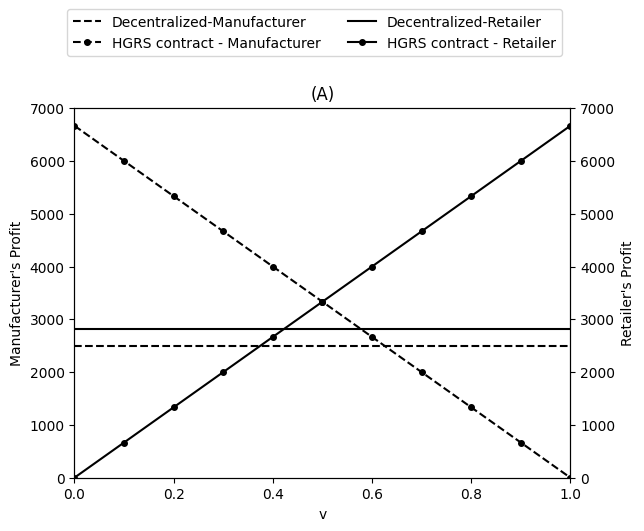

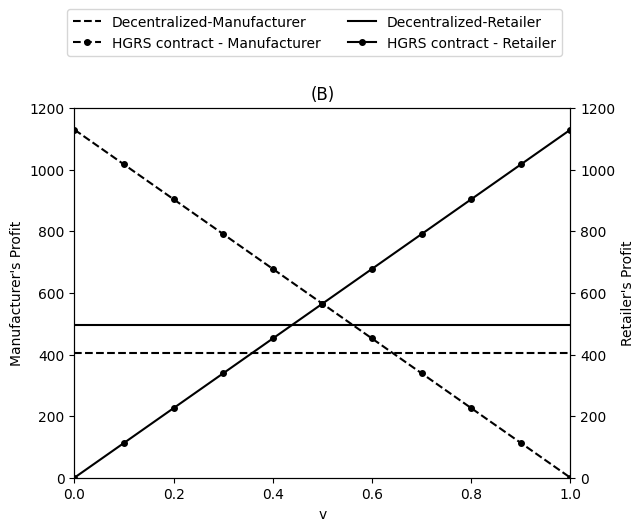

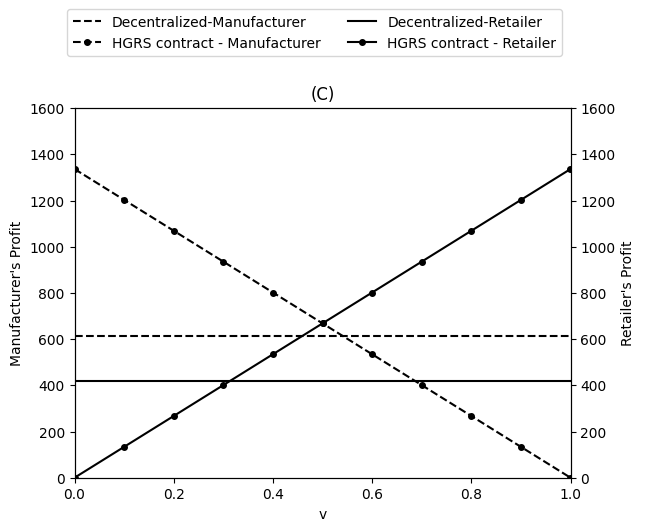

In [9]:
### Example
a = [1000, 60, 400]
b = [50, 1, 25]
tau = [10, 1.5, 5]
w = [10, 31.5, 9]
c = [0, 3, 2]
h = [2, 2, 3]
v = sorted([i / 10 for i in range(1, 10)] + [0.0001, 0.9999]) # V = [i / 10 for i in range(1, 10)] #  [i / 10 for i in range(1, 11)]
ylim = [7000, 1200, 1600]
title = ['A', 'B', 'C']

for i in range(0,3):
    draw_plot(a[i], b[i], c[i], tau[i], w[i], h[i], v, ylim[i], title[i])

## Picture of Sensitivity Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sympy import symbols, Eq, solve

In [ ]:
def demand(a, b, e, p, tau):
    return a - b*p + tau*e
def profit(a, b, c, e, h, p, w, tau, v=0, phi=0):
    return ((1-v)*w - c) * demand(a, b, e, p, tau) - (1-phi) * h*e**2

# Decentralized model
def cal_e_d_star(tau, w, c, h):
    e_d_star = tau * (w - c) / (2*h)
    return e_d_star

def cal_p_d_star(h, a, b, w, c, tau):
    p_d_star = (2*h * (a + b*w) + (w - c)*tau**2) / (4*b*h)
    return p_d_star

# Hybrid greening cost and revenue sharing contract
def find_v(a, b, e_c_star, p_c_star, e_d_star, p_d_star, tau, w, phi):
    # v_ub = ((p_c_star-c)*demand(a, b, e_c_star, p_c_star, tau) - (w-c)*demand(a, b, e_d_star, p_d_star, tau)) / (p_c_star*demand(a, b, e_c_star, p_c_star, tau))
    v_ub = (profit(a, b, c - wr, e_c_star, h, p_c_star, p_c_star, tau, 0, phi) - profit(a, b, c, e_d_star, h, p_d_star, w, tau)) / (p_c_star*demand(a, b, e_c_star, p_c_star, tau))
    v_lb = (profit(a, b, w, e_d_star, h, p_d_star, p_d_star, tau, 0, 1) + profit(a, b, 0, e_c_star, h, p_c_star, wr, tau, 0, 1-phi)) / (p_c_star*demand(a, b, e_c_star, p_c_star, tau))
    return [v_lb, v_ub]

def find_phi(a, b, c, h, tau, v):
    phi = symbols('x')
    expr = c*v*(1+phi)/(1+v) - v*(4*a*h - c*tau**2)*(phi-v)/(4*b*h - tau**2)/(v + 1) \
           - ((c*v*tau**2 - 2*v*a*h*(1-phi))/(v*tau**2 + 2*b*h*(1-phi)) + ((4*v*b*h*(1-phi) - tau**2*v*(1-v))/((v*tau**2+2*b*h*(1-phi)))) * (2*h*(a+b*c) - c*tau**2)/(4*b*h-tau**2))
    sol = solve(expr, phi)
    return sol

def find_wr(a, b, c, h, tau, v, phi):
    wr = c*v*(1+phi)/(1+v) - v*(4*a*h - c*tau**2)*(phi-v)/(4*b*h - tau**2)/(v + 1)
    return wr

def cal_e_HGRS_star(a, b, c, h, phi, v, tau, wr):
    e_HGRS_star = tau * (2*b*v*(wr - c) + (1-v)*(v*a + wr*b)) / (4*b*h*v*(1-phi) - tau**2*v*(1-v))
    return e_HGRS_star

def cal_p_HGRS_star(a, b, c, h, phi, v, tau, wr):
    p_HGRS_star = (tau**2*v*(wr - c) + 2*h*(1-phi)*(v*a + wr*b)) / (4*b*h*v*(1-phi) - tau**2*v*(1-v))
    return p_HGRS_star

def cal_D_HGRS_star(a, b, e_HGRS_star, p_HGRS_star, tau):
    D_HGRS_star = demand(a, b, e_HGRS_star, p_HGRS_star, tau)
    return D_HGRS_star

# profit for m
def cal_Pi_m_HGRS_star(a, b, c, wr, e_HGRS_star, h, p_HGRS_star, tau, v, phi):
    Pi_m_HGRS_star = profit(a, b, c - wr, e_HGRS_star, h, p_HGRS_star, p_HGRS_star, tau, v, phi)
    return Pi_m_HGRS_star

import numpy as np
import matplotlib.pyplot as plt

OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
[20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
[1038.00558139535, 972.239682819384, 913.135531380747, 859.737657370517, 811.264973384034, 767.072727272728, 726.623999999999, 689.468066889633, 655.223768488745, 623.566588235294]


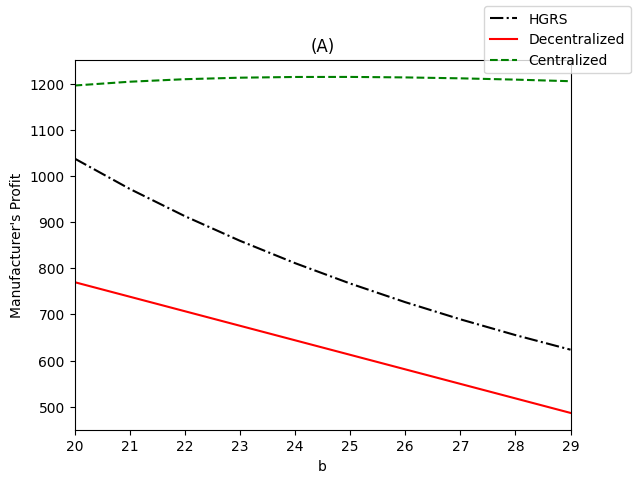

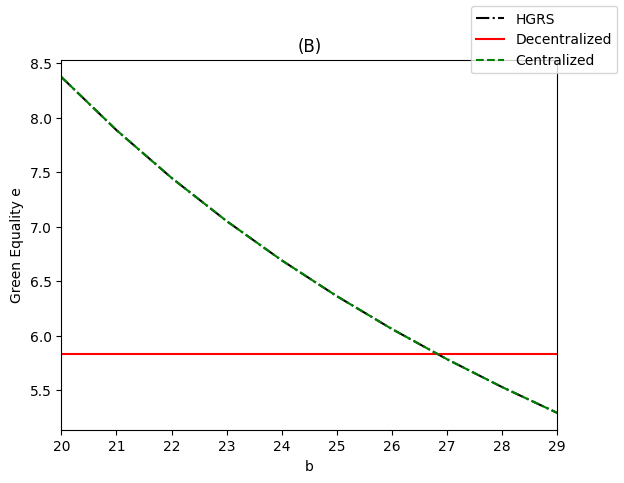

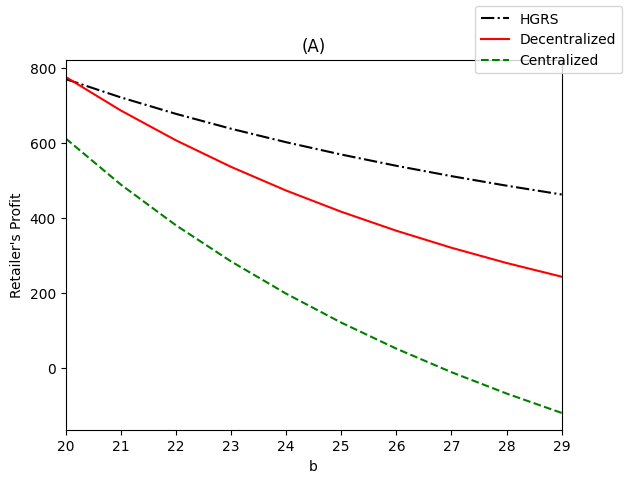

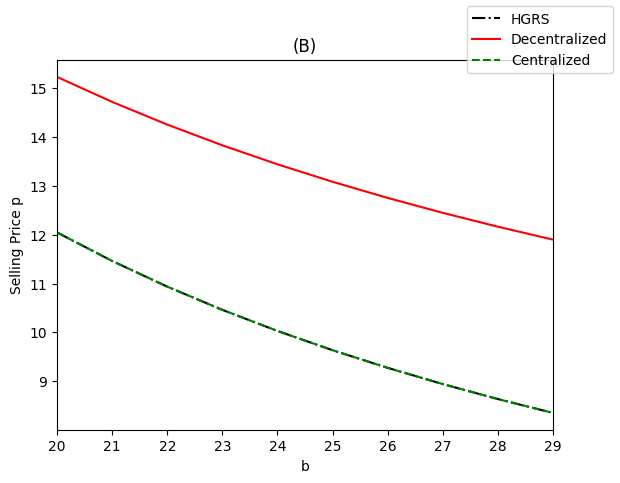

In [ ]:
x_name = 'b'
### for h & CEA
# x_lb = 0.5
# x_ub = 5
# x_num = 10
# x_step = 0.5

### for b
x_lb = 20
x_ub = 29
x_num = 10
x_step = 1

for j in [4.26]: #range(4, 6, 1):
    v = j/10
    ### Example 3
    a = 400
    b = 25
    tau = 5
    w = 9
    c = 2
    h = 3

    e_c_star_ls = []
    e_d_star_ls = []
    e_HGRS_star_ls = []
    p_c_star_ls = []
    p_d_star_ls = []
    p_HGRS_star_ls = []
    Pi_m_c_star_ls = []
    Pi_m_d_star_ls = []
    Pi_m_HGRS_star_ls = []
    Pi_r_c_star_ls = []
    Pi_r_d_star_ls = []
    Pi_r_HGRS_star_ls = []

    for i in range(int(x_lb*10), int((x_lb+x_step*10)*10), int(x_step*10)):
        b = i/10

        # Centralized model
        e_c_star = tau * (a - b*c) / (4*b*h - tau**2) # green equality
        p_c_star = (2*a*h + 2*b*c*h - c*tau**2) / (4*b*h - tau**2) # selling price

        # profit for m
        Pi_m_c_star = profit(a, b, c, e_c_star, h, p_c_star, w, tau)
        # profit for r
        Pi_r_c_star = profit(a, b, w, e_c_star, 0, p_c_star, p_c_star, tau)


        # Decentralized model
        e_d_star = cal_e_d_star(tau, w ,c ,h)
        p_d_star = cal_p_d_star(h, a, b, w, c, tau)

        # profit for m
        Pi_m_d_star = profit(a, b, c, e_d_star, h, p_d_star, w, tau)
        # profit for r
        Pi_r_d_star = profit(a, b, w, e_d_star, 0, p_d_star, p_d_star, tau)

        # Hybrid greening cost and revenue sharing contract
        phi, phi2 = find_phi(a, b, c, h, tau, v)
        if phi == -1:
            phi = phi2
        # phi = v
        wr = find_wr(a, b, c, h, tau, v, phi)
        v_range = find_v(a, b, e_c_star, p_c_star, e_d_star, p_d_star, tau, w, phi)
        if v_range[0] <= v and v <= v_range[1]:
            print('OK')
        else:
            print('error')

        e_HGRS_star = cal_e_HGRS_star(a, b, c, h, phi, v, tau, wr)
        p_HGRS_star = cal_p_HGRS_star(a, b, c, h, phi, v, tau, wr)
        # profit for m
        Pi_m_HGRS_star = profit(a, b, c - wr, e_HGRS_star, h, p_HGRS_star, p_HGRS_star, tau, v, phi)
        # profit for r
        Pi_r_HGRS_star = profit(a, b, wr, e_HGRS_star, h, p_HGRS_star, p_HGRS_star, tau, 1 - v, 1 - phi)

        e_c_star_ls.append(e_c_star)
        e_d_star_ls.append(e_d_star)
        e_HGRS_star_ls.append(e_HGRS_star)
        p_c_star_ls.append(p_c_star)
        p_d_star_ls.append(p_d_star)
        p_HGRS_star_ls.append(p_HGRS_star)
        Pi_m_c_star_ls.append(Pi_m_c_star)
        Pi_m_d_star_ls.append(Pi_m_d_star)
        Pi_m_HGRS_star_ls.append(Pi_m_HGRS_star)
        Pi_r_c_star_ls.append(Pi_r_c_star)
        Pi_r_d_star_ls.append(Pi_r_d_star)
        Pi_r_HGRS_star_ls.append(Pi_r_HGRS_star)

    ## Plot
    X = np.linspace(x_lb, x_ub, x_num)
    fig, ax1 = plt.subplots()

    # line
    ax1.plot(X, Pi_m_HGRS_star_ls, label='HGRS', color='black', linestyle='-.')
    ax1.plot(X, Pi_m_d_star_ls, label='Decentralized', color='red', linestyle='-')
    ax1.plot(X, Pi_m_c_star_ls, label='Centralized', color='green', linestyle='--')

    ax1.set_xlabel(x_name)
    ax1.set_ylabel('Manufacturer\'s Profit', color='black')
    ax1.tick_params('y', colors='black')
    ax1.set_xlim(x_lb, x_ub)

    fig.legend()
    plt.title('(A)')
    plt.savefig(x_name + '_Manufacturer\'s Profit')
    plt.show()

    ## Plot
    X = np.linspace(x_lb, x_ub, x_num)
    fig, ax1 = plt.subplots()

    # line
    ax1.plot(X, e_HGRS_star_ls, label='HGRS', color='black', linestyle='-.')
    ax1.plot(X, e_d_star_ls, label='Decentralized', color='red', linestyle='-')
    ax1.plot(X, e_c_star_ls, label='Centralized', color='green', linestyle='--')

    ax1.set_xlabel(x_name)
    ax1.set_ylabel('Green Equality e', color='black')
    ax1.tick_params('y', colors='black')
    ax1.set_xlim(x_lb, x_ub)

    fig.legend()
    plt.title('(B)')
    plt.savefig(x_name + '_Green Equality e')
    plt.show()

    ## Plot
    X = np.linspace(x_lb, x_ub, x_num)
    fig, ax1 = plt.subplots()

    # line
    ax1.plot(X, Pi_r_HGRS_star_ls, label='HGRS', color='black', linestyle='-.')
    ax1.plot(X, Pi_r_d_star_ls, label='Decentralized', color='red', linestyle='-')
    ax1.plot(X, Pi_r_c_star_ls, label='Centralized', color='green', linestyle='--')

    ax1.set_xlabel(x_name)
    ax1.set_ylabel('Retailer\'s Profit', color='black')
    ax1.tick_params('y', colors='black')
    ax1.set_xlim(x_lb, x_ub)

    fig.legend()
    plt.title('(A)')
    plt.savefig(x_name + '_Retailer\'s Profit')
    plt.show()

    ## Plot
    X = np.linspace(x_lb, x_ub, x_num)
    fig, ax1 = plt.subplots()

    # line
    ax1.plot(X, p_HGRS_star_ls, label='HGRS', color='black', linestyle='-.')
    ax1.plot(X, p_d_star_ls, label='Decentralized', color='red', linestyle='-')
    ax1.plot(X, p_c_star_ls, label='Centralized', color='green', linestyle='--')

    ax1.set_xlabel(x_name)
    ax1.set_ylabel('Selling Price p', color='black')
    ax1.tick_params('y', colors='black')
    ax1.set_xlim(x_lb, x_ub)

    fig.legend()
    plt.title('(B)')
    plt.savefig(x_name + '_Selling Price p')
    plt.show()